In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.datasets import fetch_california_housing

# MedInc median income in block group
# HouseAge median house age in block group
# AveRooms average number of rooms per household
# AveBedrms average number of bedrooms per household
# Population block group population
# AveOccup average number of household members
# Latitude block group latitude
# Longitude block group longitude

dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
X = dataset['data']
y = dataset['target']
X.shape,y.shape

((20640, 8), (20640,))

In [3]:
Xpd = pd.DataFrame(X)
Xpd.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
Xpd.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=12)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrainnorm = scaler.transform(xtrain)
xtestnorm = scaler.transform(xtest)
xtrainnorm, xtestnorm

(array([[0.42161487, 0.05882353, 0.04051082, ..., 0.00197112, 0.5727949 ,
         0.23705179],
        [0.12812927, 0.78431373, 0.03267651, ..., 0.00276747, 0.02763018,
         0.71713147],
        [0.34559523, 0.29411765, 0.0345278 , ..., 0.00160751, 0.18172157,
         0.57171315],
        ...,
        [0.11019848, 0.23529412, 0.03083752, ..., 0.00124312, 0.70563231,
         0.27091633],
        [0.14430835, 0.35294118, 0.01982441, ..., 0.00135866, 0.17109458,
         0.60856574],
        [0.26572047, 0.7254902 , 0.03763263, ..., 0.00140229, 0.02444208,
         0.7250996 ]]),
 array([[0.26652736, 0.80392157, 0.03095506, ..., 0.00209109, 0.15940489,
         0.61952191],
        [0.16002538, 0.50980392, 0.02340878, ..., 0.00123767, 0.54303932,
         0.2250996 ],
        [0.28213404, 0.29411765, 0.03282027, ..., 0.00183767, 0.11583422,
         0.66135458],
        ...,
        [0.12692239, 0.43137255, 0.02925979, ..., 0.0014556 , 0.76833156,
         0.27390438],
        [0.2

In [31]:
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential([
    Dense(10),
    Dense(10),
    #Dropout(0.5),
    Dense(1)
])
model.compile(loss = 'mae', optimizer = 'sgd', metrics = 'mae')
history = model.fit(xtrainnorm,ytrain, epochs=10, validation_data = (xtestnorm,ytest)) #, callbacks=[earlystop])

Epoch 1/10
516/516 [==============================] - 1s 790us/step - loss: 0.8928 - mae: 0.8928 - val_loss: 0.8297 - val_mae: 0.8297
Epoch 2/10
516/516 [==============================] - 0s 652us/step - loss: 0.7205 - mae: 0.7205 - val_loss: 0.6129 - val_mae: 0.6129
Epoch 3/10
516/516 [==============================] - 0s 657us/step - loss: 0.5585 - mae: 0.5585 - val_loss: 0.5489 - val_mae: 0.5489
Epoch 4/10
516/516 [==============================] - 0s 653us/step - loss: 0.5414 - mae: 0.5414 - val_loss: 0.5502 - val_mae: 0.5502
Epoch 5/10
516/516 [==============================] - 0s 730us/step - loss: 0.5361 - mae: 0.5361 - val_loss: 0.5476 - val_mae: 0.5476
Epoch 6/10
516/516 [==============================] - 0s 758us/step - loss: 0.5340 - mae: 0.5340 - val_loss: 0.5437 - val_mae: 0.5437
Epoch 7/10
516/516 [==============================] - 0s 689us/step - loss: 0.5318 - mae: 0.5318 - val_loss: 0.5345 - val_mae: 0.5345
Epoch 8/10
516/516 [==============================] - 0s 672us

<AxesSubplot:>

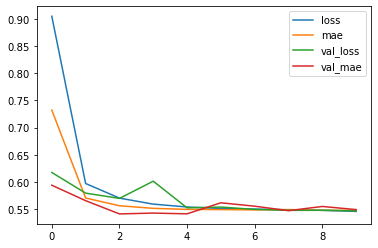

In [15]:
pd.DataFrame(history.history).plot()

In [8]:
evahistory = model.evaluate(xtestnorm,ytest)

129/129 [==============================] - 0s 522us/step - loss: 0.5310 - mae: 0.5310


<AxesSubplot:>

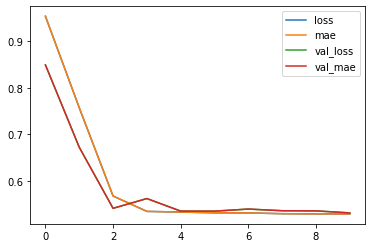

In [9]:
pd.DataFrame(history.history).plot()

In [13]:
xtestnorm[0], ytest[0], xtestnorm[0].dtype

(array([0.26652736, 0.80392157, 0.03095506, 0.02051528, 0.04862935,
        0.00209109, 0.15940489, 0.61952191]),
 2.114,
 dtype('float64'))

In [11]:
import numpy as np
xpred = np.array([[0.26652736, 0.80392157, 0.03095506, 0.02051528, 0.04862935,
       0.00209109, 0.15940489, 0.61952191]])
xpred

array([[0.26652736, 0.80392157, 0.03095506, 0.02051528, 0.04862935,
        0.00209109, 0.15940489, 0.61952191]])

In [30]:
xtestnorm[0]

array([0.26652736, 0.80392157, 0.03095506, 0.02051528, 0.04862935,
       0.00209109, 0.15940489, 0.61952191])

In [34]:
ypred = model.predict(xtestnorm)
ypred[0:10],ytest[0:10]

(array([[2.3177052],
        [1.7936208],
        [2.1814313],
        [2.5447106],
        [1.2109523],
        [1.9856943],
        [2.3256009],
        [1.5995387],
        [1.765397 ],
        [1.8834536]], dtype=float32),
 array([2.114, 1.952, 2.418, 1.283, 0.708, 2.024, 3.786, 1.185, 1.165,
        1.869]))

In [ ]:
xpred1 = np.array([[0.56652736, 0.10392157, 0.08095506, 0.02051528, 0.04862935, 0.00209109, 0.15940489, 0.61952191]])
model.predict(xpred1)

In [38]:
ytest,ypred, tf.squeeze(ypred)

(array([2.114, 1.952, 2.418, ..., 0.873, 3.667, 2.213]),
 array([[2.3177052],
        [1.7936208],
        [2.1814313],
        ...,
        [0.633906 ],
        [2.5066032],
        [2.2984495]], dtype=float32),
 <tf.Tensor: shape=(4128,), dtype=float32, numpy=
 array([2.3177052, 1.7936208, 2.1814313, ..., 0.633906 , 2.5066032,
        2.2984495], dtype=float32)>)

In [39]:
ytest - tf.squeeze(ypred)

<tf.Tensor: shape=(4128,), dtype=float32, numpy=
array([-0.20370507,  0.1583792 ,  0.23656869, ...,  0.23909402,
        1.1603968 , -0.08544946], dtype=float32)>

In [49]:
yprocess = ytest - tf.squeeze(ypred)
sum=0
for val in yprocess:
  sum = sum + val*val
print(sum)

tf.Tensor(2318.1204, shape=(), dtype=float32)


In [51]:
sum=0
for val in yprocess:
  if val > 0:
    sum = sum + val
  else:
    sum = sum - val
print(sum)

tf.Tensor(2203.5588, shape=(), dtype=float32)
